In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv
/kaggle/input/titanic/titanic.txt


In [2]:
import numpy as np

In [3]:
!pip install numpy

In [4]:
a = np.hstack ( (np.array(['M','M','F']).reshape(3,1), np.array(['Y','Y','N']).reshape(3,1)))
a

array([['M', 'Y'],
       ['M', 'Y'],
       ['F', 'N']], dtype='<U1')

In [5]:
a[:,0] == 'M'

array([ True,  True, False])

In [6]:
a[:,1] == 'Y'

array([ True,  True, False])

In [7]:
a[ (a[:,0] == 'M') & (a[:,1] == 'Y') ]

array([['M', 'Y'],
       ['M', 'Y']], dtype='<U1')

# 5. Important Data Visualisation

**Histogram Plot** **:** Use for see the distribution of value in our data

In [8]:
titanics = np.genfromtxt('/kaggle/input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [9]:
titanics[0,:]

array(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number',
       'Passenger Fare', 'Cabin', 'Port of Embarkation', 'Life Boat',
       'Survived'], dtype='<U84')

(array([1210.,   62.,   37.]),
 array([0., 2., 4., 6.]),
 <BarContainer object of 3 artists>)

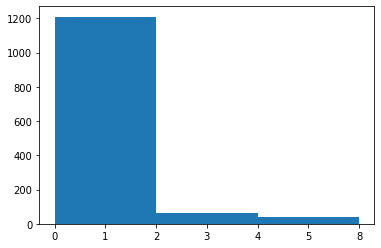

In [10]:
import matplotlib.pyplot as plt
plt.hist(titanics[1:,4], bins=3)

In [11]:
relative = np.array([float(item) for item in titanics[1:,4]])
relative

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
survive = titanics[1:,-1]
survive

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype='<U84')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe45c684810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe45c68e050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe45c684390>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe45c68e910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe45c68ed10>,
 'means': []}

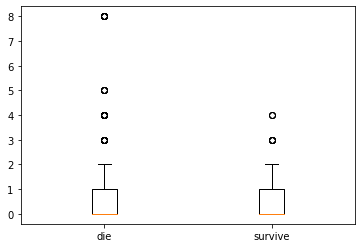

In [13]:
plt.boxplot([relative[survive=='No'], relative[survive=='Yes'] ], labels = ['die','survive'])

Text(0, 0.5, 'children')

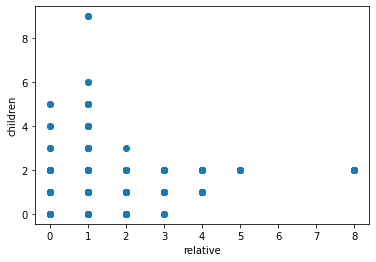

In [14]:
import seaborn as sns
relative = np.array([float(item) for item in titanics[1:,4]])
children = np.array([float(item) for item in titanics[1:,5]])
plt.scatter(relative,children)
plt.xlabel("relative")
plt.ylabel("children")

# Folium Library (Geospatial Data)

In [15]:
import folium
world_map = folium.Map()
world_map

In [16]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15)
cmu_map

In [17]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15, tiles='Stamen Terrain')
cmu_map

In [18]:
folium.TileLayer('Stamen Watercolor').add_to(cmu_map)
cmu_map

In [19]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 2.9 MB/s eta 0:00:011


In [20]:
location = 'น้ำตกแม่สา'
loc = geocoder.osm(location)
loc.json

{'accuracy': 0.75,
 'address': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
 'bbox': {'northeast': [18.9066127, 98.8967386],
  'southwest': [18.9065127, 98.8966386]},
 'confidence': 10,
 'country': 'ประเทศไทย',
 'country_code': 'th',
 'importance': 0.75,
 'lat': 18.9065627,
 'lng': 98.8966886,
 'ok': True,
 'osm_id': 1638690882,
 'osm_type': 'node',
 'place_id': 16442596,
 'place_rank': 20,
 'postal': '50180',
 'quality': 'waterfall',
 'raw': {'place_id': 16442596,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 1638690882,
  'boundingbox': ['18.9065127', '18.9066127', '98.8966386', '98.8967386'],
  'lat': '18.9065627',
  'lon': '98.8966886',
  'display_name': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
  'place_rank': 20,
  'category': 'waterway',
  'type': 'waterfall',
  'importance': 0.75,
  'address': {'waterway': 'น้ำตกแม่สา',
   'town': 'แม่แรม',
   'state': 'จังหวัดเชียงใหม่',
   

In [21]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map.add_child(Marker(location=latlng, popup="This is waterfall", icon = folium.Icon(color = 'blue', icon = 'home'), tooltip = "Click for more"))
maesa_map

In [22]:
loc = geocoder.osm('สวนสัตว์เชียงใหม่')

In [23]:
folium.CircleMarker(
  location = [loc.lat, loc.lng],
  radius = 50,
  color = '#428bca',
  fill = True,
  fill_color = '#428bca'
).add_to(cmu_map)

In [24]:
folium.TileLayer('OpenStreetMap').add_to(cmu_map)
cmu_map

In [25]:
cmu_map

# Pandas

# 1. Load Data

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


ถ้าไม่มี head ให้ใส่ none

# 2. Access Data & Basic Functions

In [28]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [29]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [30]:
df['Name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [31]:
df.iloc[2,0:5]

Passenger Class                                              First
Name                                  Allison, Miss. Helen Loraine
Sex                                                         Female
Age                                                            2.0
No of Siblings or Spouses on Board                               1
Name: 2, dtype: object

In [32]:
df.iloc[:,3]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: Age, Length: 1309, dtype: float64

In [33]:
df.loc[:,'Passenger Class':'Age']

,Passenger Class,Name,Sex,Age
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000
1,First,"Allison, Master. Hudson Trevor",Male,0.9167
2,First,"Allison, Miss. Helen Loraine",Female,2.0000
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000
...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000
1305,Third,"Zabour, Miss. Thamine",Female,NaN
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000


In [34]:
df.dtypes

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [35]:
df['Age'].max()

80.0

In [36]:
min(df['Age'])

0.1667

In [37]:
df[df['Age']==df['Age'].min()]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


In [38]:
df['Name'][df['Age']==df['Age'].max()]

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [39]:
df.shape

(1309, 12)

In [40]:
df['Sex'].tolist()

['Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 '

In [41]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [42]:
df['Label'] = df['Age'] >= 20
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


# 3. Check Missing Values

In [43]:
df.isnull()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [44]:
df.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

In [45]:
df['Age'].isnull().sum()

263

In [46]:
df['Passenger Fare'].isnull().sum()

1

In [47]:
df['Cabin'].isnull().sum()

1014

# 4. Remove Values

In [48]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare',
       'Port of Embarkation', 'Life Boat', 'Survived', 'Label'],
      dtype='object')

In [49]:
df_clean = df_clean.dropna(1,'any')
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived', 'Label'],
      dtype='object')

In [50]:
df_clean = df_clean.dropna(0,'any')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",Female,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,0,0,No,True


In [51]:
df_clean.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Survived                              False
Label                                 False
dtype: bool

# 5. Replace values

In [52]:
df_clean['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [53]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


# 6. Replace string values to unique integers

In [54]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])
p_class

array([0, 0, 0, ..., 2, 2, 2])

In [55]:
levels

Index(['First', 'Second', 'Third'], dtype='object')

In [56]:
df_clean['Passenger Class'] = p_class + 1
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,1,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,1,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,1,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,1,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,1,0,No,False
1305,3,"Zabour, Miss. Thamine",F,1,0,No,False
1306,3,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,3,"Zakarian, Mr. Ortin",M,0,0,No,True


In [57]:
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                   object
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                              object
Label                                   bool
dtype: object

In [58]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                    int64
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                               int64
Label                                   bool
dtype: object

# 7. Set Index

In [59]:
df_clean = df_clean.set_index('Name')
df_clean

,Passenger Class,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
Name,,,,,,
"Allen, Miss. Elisabeth Walton",1,0,0,0,0,True
"Allison, Master. Hudson Trevor",1,1,1,2,0,False
"Allison, Miss. Helen Loraine",1,0,1,2,1,False
"Allison, Mr. Hudson Joshua Creighton",1,1,1,2,1,True
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,1,2,1,True
...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,1,0,1,False
"Zabour, Miss. Thamine",3,0,1,0,1,False
"Zakarian, Mr. Mapriededer",3,1,0,0,1,True


In [60]:
df_clean.loc['Zabour, Miss. Hileni','Sex']

0

# 8. Cross Tab Plot

<AxesSubplot:xlabel='Passenger Class'>

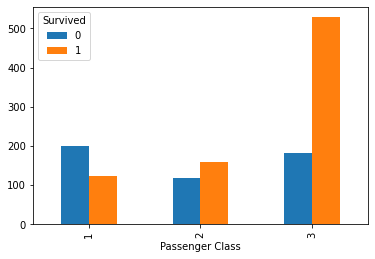

In [61]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

# Ex.1

In [62]:
cl = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
cl

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
cl_clean = cl
cl_clean.columns

Index(['hn', 'age', 'parity', 'hiv', 'menopaus', 'disease', 'surgery',
       'conization', 'OPDsize', 'appearance', 'stage', 'pchemo', 'Wardsize',
       'finalhisto', 'nodeyiel', 'RHlvsi', 'depth', 'size', 'utmet',
       'vgmargin', 'vgmet', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [64]:
cl_clean = cl_clean.dropna(0,'any')

In [65]:
cl_clean.isnull().any()

hn            False
age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [66]:
cl_clean = cl_clean.drop('hiv',1)
cl_clean = cl_clean.drop('size',1)
cl_clean = cl_clean.drop('utmet',1)
cl_clean = cl_clean.drop('vgmet',1)
cl_clean = cl_clean.drop('surgery',1)
cl_clean = cl_clean.drop('pchemo',1)

In [67]:
cl_clean.isnull().any()

hn            False
age           False
parity        False
menopaus      False
disease       False
conization    False
OPDsize       False
appearance    False
stage         False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
vgmargin      False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [68]:
cl_clean['age'] = cl_clean['age'] <= 20


In [69]:
cl_clean['age'] = cl_clean['age'].replace(True,'Young')
cl_clean['age'] = cl_clean['age'].replace(False,'Old')
cl_clean

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
0,2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
3,2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
4,2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
5,2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
1694,3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
1695,3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0
1718,3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0


In [79]:
cl_clean2 = cl_clean


In [80]:
cl_clean3 = cl_clean2.groupby('pmmet').sample(n=10, random_state=1)
cl_clean3.sort_values(by=['pmmet'])

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
18,743801,Old,1,0.0,0,1.0,4.0,2.0,5.0,4.0,2.0,27.0,7.0,3.0,0.0,0.0,0.0,0.0
1397,3527827,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,17.0,1.0,2.0,0.0,0.0,0.0,0.0
1684,3805169,Old,1,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,33.0,0.0,1.0,1.0,0.0,0.0,0.0
151,2701895,Old,2,0.0,0,0.0,2.0,1.0,4.0,2.0,2.0,29.0,2.0,3.0,0.0,0.0,0.0,0.0
531,2866037,Old,5,1.0,0,0.0,1.5,3.0,4.0,3.0,3.0,22.0,11.0,3.0,0.0,1.0,0.0,0.0
1539,3662438,Old,2,0.0,0,0.0,0.0,5.0,4.0,1.5,1.0,12.0,999.0,3.0,1.0,0.0,0.0,0.0
457,2832194,Old,2,0.0,1,0.0,2.0,2.0,6.0,3.0,1.0,28.0,0.0,2.0,1.0,0.0,0.0,0.0
1154,3349232,Old,3,1.0,1,0.0,5.0,2.0,6.0,4.0,2.0,44.0,8.0,3.0,0.0,0.0,0.0,0.0
1678,3799532,Old,1,0.0,1,0.0,6.0,1.0,6.0,4.0,1.0,32.0,3.0,3.0,0.0,0.0,0.0,0.0
995,3248147,Old,4,1.0,0,0.0,1.5,2.0,4.0,1.5,1.0,35.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='age'>

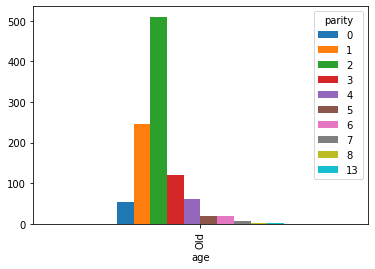

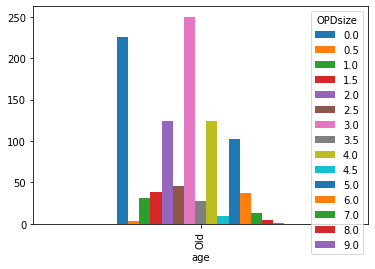

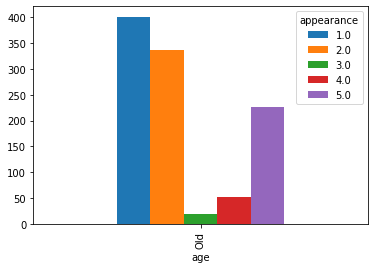

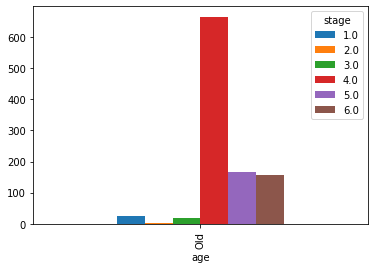

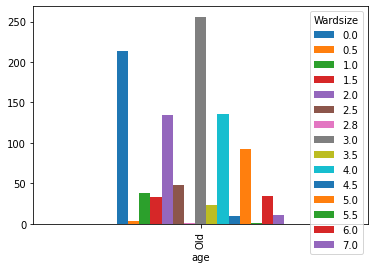

In [82]:

pd.crosstab(cl_clean['age'],cl_clean['parity']).plot(kind='bar')
pd.crosstab(cl_clean['age'],cl_clean['OPDsize']).plot(kind='bar')
pd.crosstab(cl_clean['age'],cl_clean['appearance']).plot(kind='bar')
pd.crosstab(cl_clean['age'],cl_clean['stage']).plot(kind='bar')
pd.crosstab(cl_clean['age'],cl_clean['Wardsize']).plot(kind='bar')

In [85]:
!pip install geocoder
import geocoder
import folium

https://news.thaipbs.or.th/content/303445

In [93]:
CNX_covid = folium.Map(location = [18.7882778, 98.9868056], zoom_start = 11)
folium.Circle(radius=5925, location=[18.790278, 98.984444], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=500, location=[18.6878984, 99.0423731], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=1080, location=[18.848611, 99.045], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=390, location=[18.913889, 98.945], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=425, location=[18.686944,98.918889], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=300, location=[18.870278, 99.136667], color='red',fill = True).add_to(CNX_covid)
folium.Circle(radius=520, location=[18.745278, 99.120278], color='red',fill = True).add_to(CNX_covid)
CNX_covid